# Boston Housing Prices Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [2]:
# Matplotlib has some built in style sheets
mpl.style.use('fivethirtyeight')

## Data Loading

Notice that I am loading in the data in the same way that we did for our visualization module. Time to refactor? It migth be good to abstract away some of this as functions, that way we aren't copying and pasting code between all of our notebooks.

In [3]:
boston = datasets.load_boston()

# Sklearn uses a dictionary like object to hold its datasets
X = boston['data']
y = boston['target']

feature_names = list(boston.feature_names)

In [4]:
X_df = pd.DataFrame(X)
X_df.columns = boston.feature_names
X_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### Linear Regression Over One Dimension

In [5]:
def add_axis(feature):
    """Add a new axis to a feature array
    
    sklearn expects at least a 2D array
    of features for its models. This is
    just a helper function when we want to 
    build a model using a single feature 
    dimension
    
    Args:
        feature (np.array): feature to 
        add an axis to
        
    Returns:
        2D array of shape (len(feature), 1)
    """
    return feature[:, np.newaxis]

In [6]:
def split_data(x, y):
    """Create train and test splits
    
    This is a sneaky split used to illustrate
    the potential for ML modelds to overfit. 
    Don't use this in your code. Instead, 
    use sklearn's train_test_split.
    
    Args:
        x (np.array): features
        y (np.array): labels
        
    Returns:
        x_train (np.array): train features
        x_test (np.array): test features
        y_train (np.array): train labels
        y_test (np.array): test labels
    """
    train_idxs = x < 3
    test_idxs = train_idxs == False
    
    x_train = add_axis(x[train_idxs])
    x_test = add_axis(x[test_idxs])
    y_train = y[train_idxs.squeeze()]
    y_test = y[test_idxs.squeeze()]
    
    return x_train, x_test, y_train, y_test

In [7]:
distance_to_employment = X_df['DIS']

x_train, x_test, y_train, y_test = split_data(
    distance_to_employment, y
)

In [8]:
model = LinearRegression()

In [9]:
model.fit(x_train, y_train)

LinearRegression()

### Model Diagnostics

In [10]:
preds_train = model.predict(x_train)
preds_test = model.predict(x_test)

In [11]:
def summary(y_true, y_pred):
    """"""
    print('Mean squared error: %.2f'
      % mean_squared_error(y_true, y_pred)
    )

    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'
          % r2_score(y_true, y_pred))

In [12]:
print('Model Coefficients: \n', model.coef_)

print('\nTrain Results:')
summary(y_train, preds_train)

print('\nTest Results')
summary(y_test, preds_test)

Model Coefficients: 
 [5.0263637]

Train Results:
Mean squared error: 96.89
Coefficient of determination: 0.05

Test Results
Mean squared error: 258.47
Coefficient of determination: -3.73


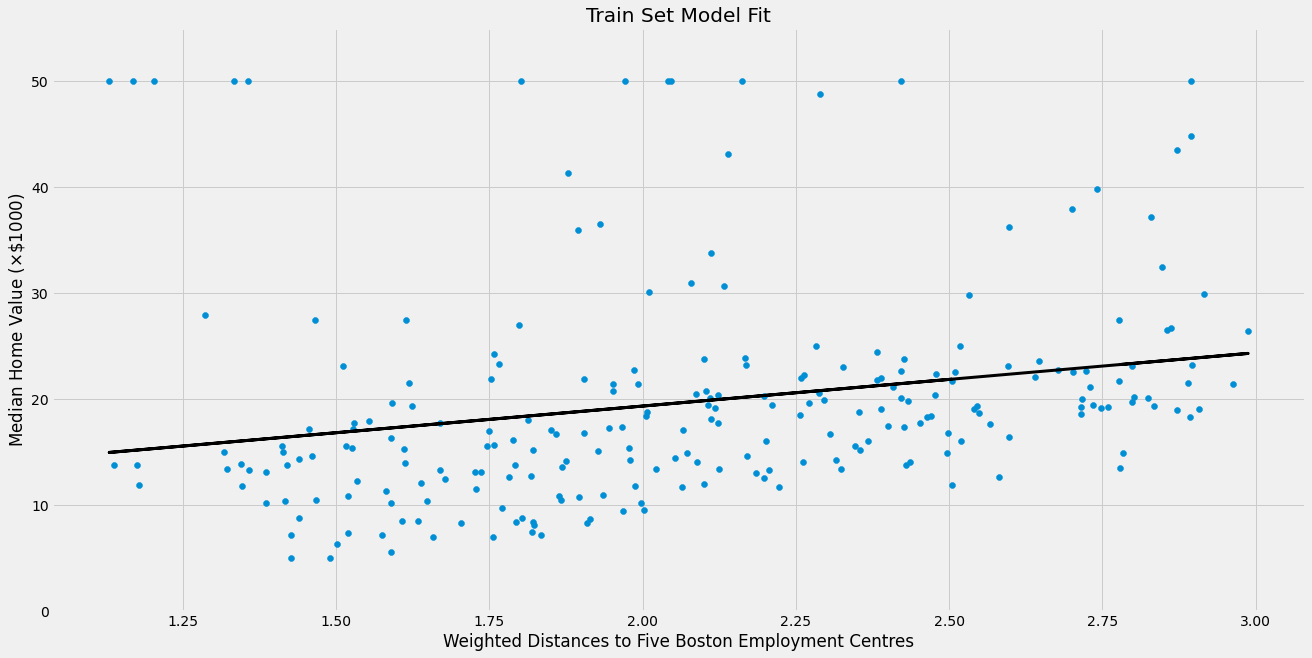

In [13]:
# Train Set Predictions
plt.figure(figsize=(20, 10))
plt.scatter(x_train, y_train)
plt.plot(x_train, preds_train, color='black', linewidth=3)

plt.ylim(0, 55)
plt.xlabel("Weighted Distances to Five Boston Employment Centres")
plt.ylabel(r"Median Home Value ($\times \$1000$)")
plt.title("Train Set Model Fit")
plt.show()

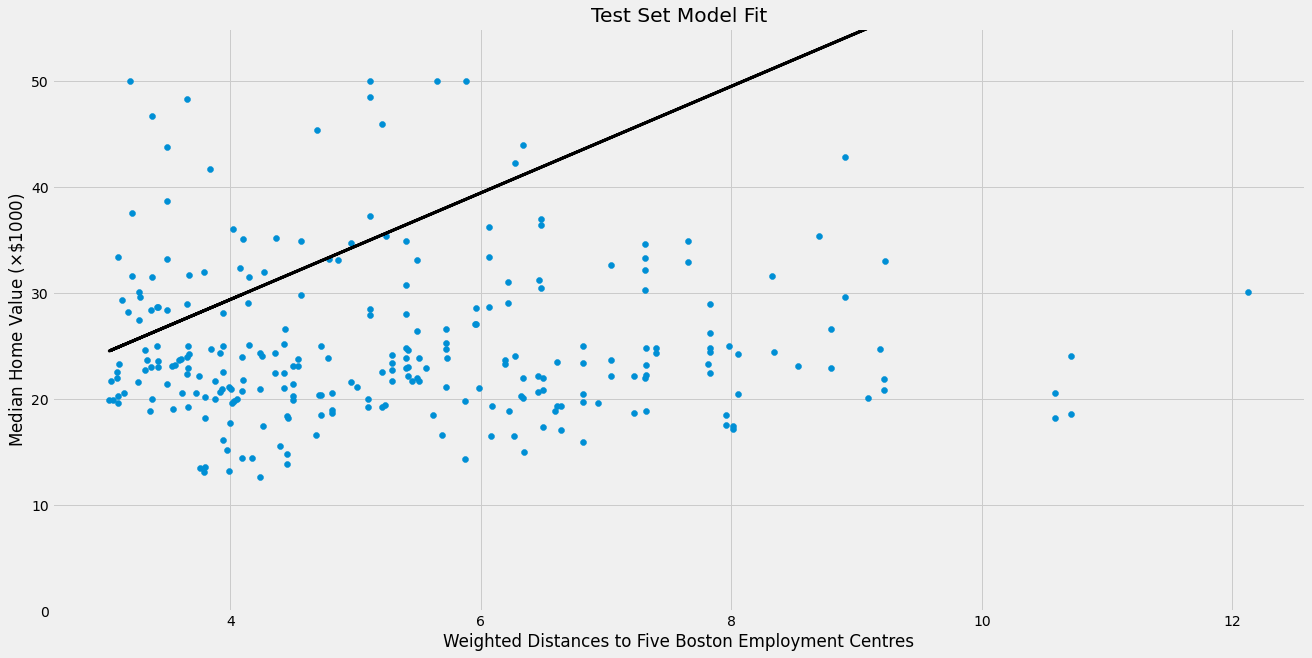

In [14]:
# Test Set Predictions
plt.figure(figsize=(20, 10))
plt.scatter(x_test, y_test)
plt.plot(x_test, preds_test, color='black', linewidth=3)

plt.ylim(0, 55)
plt.xlabel("Weighted Distances to Five Boston Employment Centres")
plt.ylabel(r"Median Home Value ($\times \$1000$)")
plt.title("Test Set Model Fit")
plt.show()

### Why So Bad on the Test Set? 

Because the difference in the distribution of values for the weighted distances to the employment centers were different between the train and test set. I know, because I made sure it was.

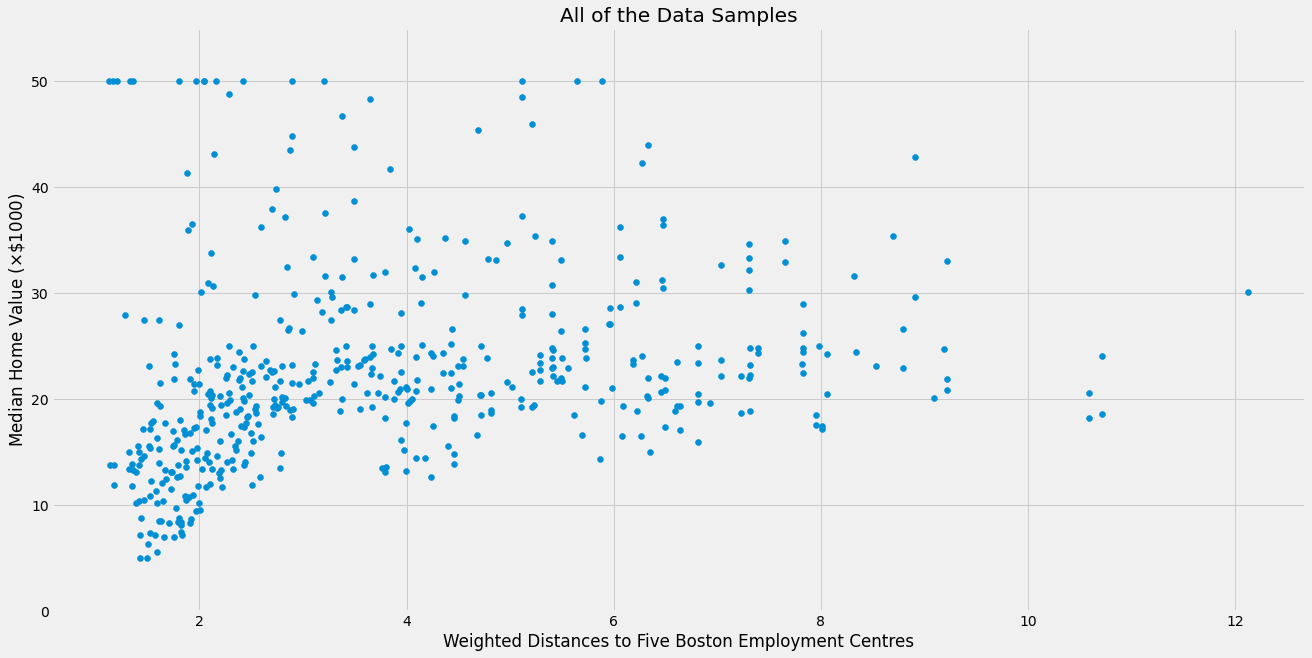

In [15]:
plt.figure(figsize=(20, 10))
plt.scatter(distance_to_employment, y)

plt.ylim(0, 55)
plt.xlabel("Weighted Distances to Five Boston Employment Centres")
plt.ylabel(r"Median Home Value ($\times \$1000$)")
plt.title("All of the Data Samples")
plt.show()

In [16]:
preds_all = model.predict(
    add_axis(distance_to_employment)
)

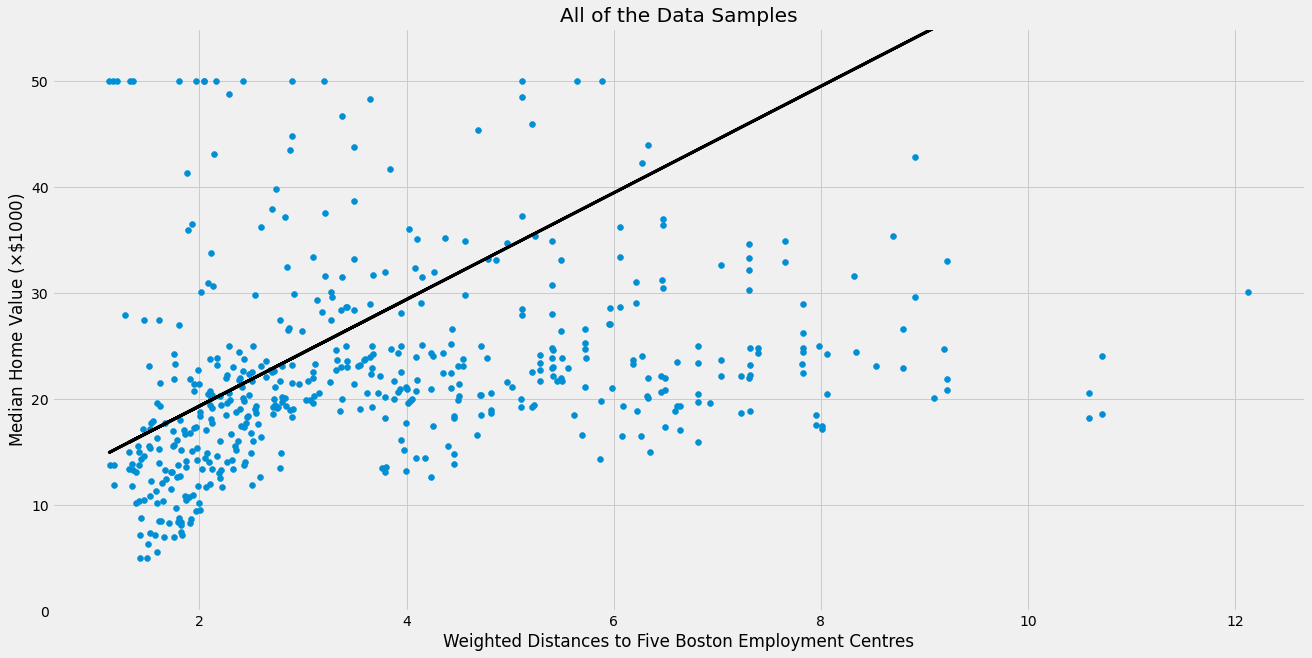

In [17]:
plt.figure(figsize=(20, 10))
plt.scatter(distance_to_employment, y)
plt.plot(distance_to_employment, preds_all, color='black', linewidth=3)

plt.ylim(0, 55)
plt.xlabel("Weighted Distances to Five Boston Employment Centres")
plt.ylabel(r"Median Home Value ($\times \$1000$)")
plt.title("All of the Data Samples")
plt.show()

## A More Sensible Data Split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(
    distance_to_employment, y, test_size=0.33, random_state=42
)

# Since we are only using one feature
x_train = add_axis(x_train)
x_test = add_axis(x_test)

In [19]:
lin_reg = LinearRegression()
gbm = GradientBoostingRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)

In [20]:
lin_reg.fit(x_train, y_train)
gbm.fit(x_train, y_train)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=1)

In [21]:
lin_reg_preds_train = lin_reg.predict(x_train)
gbm_preds_train = gbm.predict(x_train)
rf_preds_train = lin_reg.predict(x_train)

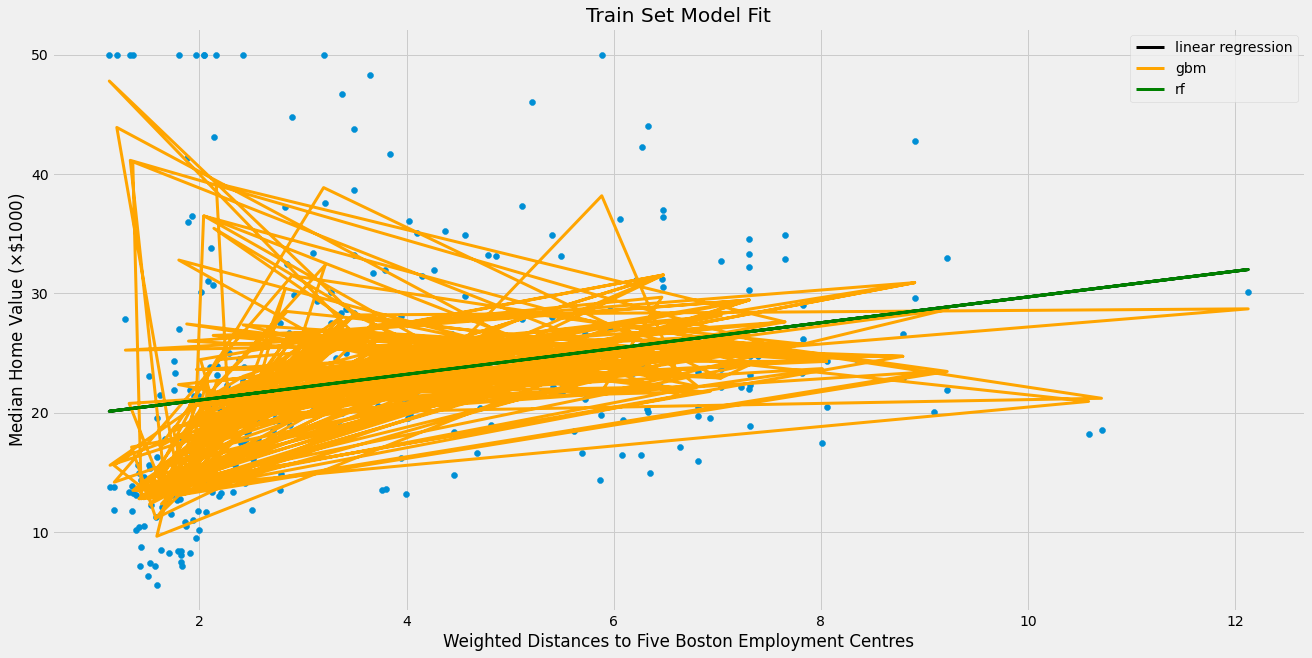

In [22]:
# Train Set Predictions
plt.figure(figsize=(20, 10))
plt.scatter(x_train, y_train)
plt.plot(x_train, lin_reg_preds_train, label='linear regression', color='black', linewidth=3)
plt.plot(x_train, gbm_preds_train, label='gbm', color='orange', linewidth=3)
plt.plot(x_train, rf_preds_train, label='rf', color='green', linewidth=3)

plt.xlabel("Weighted Distances to Five Boston Employment Centres")
plt.ylabel(r"Median Home Value ($\times \$1000$)")
plt.title("Train Set Model Fit")
plt.legend()
plt.show()

In [23]:
lin_reg_preds_test = lin_reg.predict(x_test)
gbm_preds_test = gbm.predict(x_test)
rf_preds_test = lin_reg.predict(x_test)

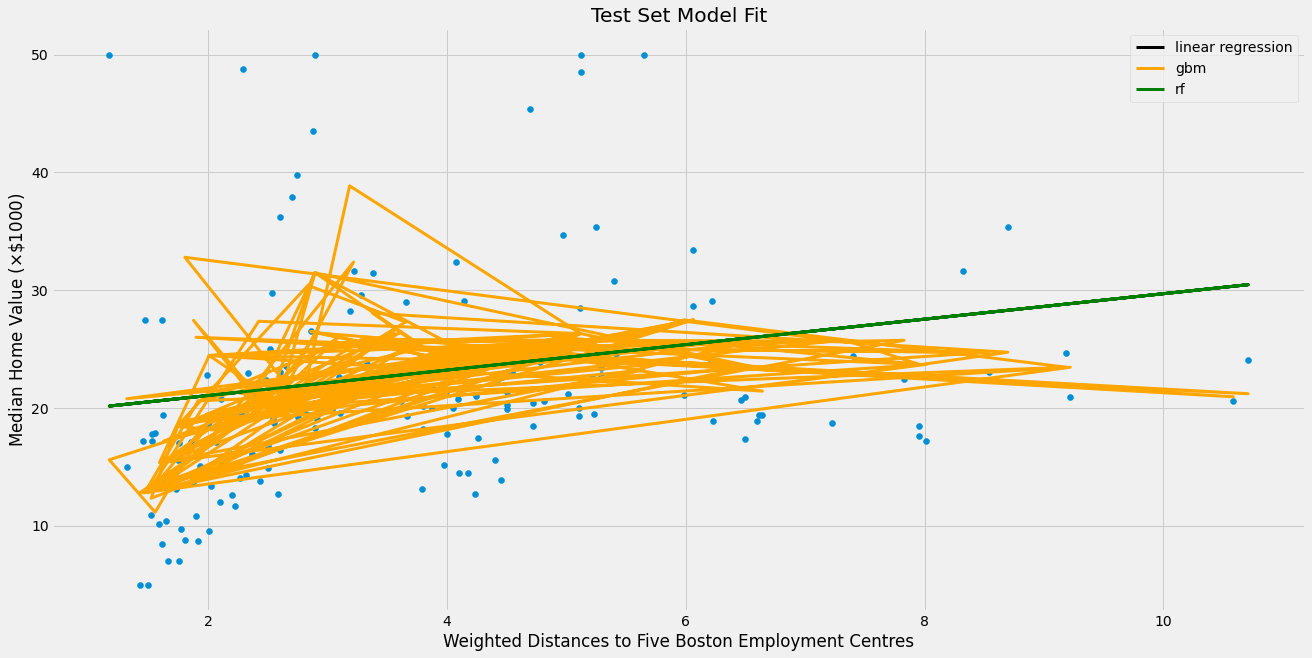

In [24]:
# Train Set Predictions
plt.figure(figsize=(20, 10))
plt.scatter(x_test, y_test)
plt.plot(x_test, lin_reg_preds_test, label='linear regression', color='black', linewidth=3)
plt.plot(x_test, gbm_preds_test, label='gbm', color='orange', linewidth=3)
plt.plot(x_test, rf_preds_test, label='rf', color='green', linewidth=3)

plt.xlabel("Weighted Distances to Five Boston Employment Centres")
plt.ylabel(r"Median Home Value ($\times \$1000$)")
plt.title("Test Set Model Fit")
plt.legend()
plt.show()

In [25]:
print('Linear Regression Train Results:')
summary(y_train, lin_reg_preds_train)

print('\nLinear Regression Test Results')
summary(y_test, lin_reg_preds_test)

Linear Regression Train Results:
Mean squared error: 82.80
Coefficient of determination: 0.06

Linear Regression Test Results
Mean squared error: 72.42
Coefficient of determination: 0.04


In [26]:
print('RF Train Results:')
summary(y_train, rf_preds_train)

print('\nRF Test Results')
summary(y_test, rf_preds_test)

RF Train Results:
Mean squared error: 82.80
Coefficient of determination: 0.06

RF Test Results
Mean squared error: 72.42
Coefficient of determination: 0.04


In [27]:
print('GBM Train Results:')
summary(y_train, gbm_preds_train)

print('\nGBM Test Results')
summary(y_test, gbm_preds_test)

GBM Train Results:
Mean squared error: 35.57
Coefficient of determination: 0.60

GBM Test Results
Mean squared error: 71.02
Coefficient of determination: 0.06
